* Iris Dataset Is Simple Task For Machine-learning As You Can See It Has 6 Columns And 150 Row That Represent 3 Different of class Each Class Has 50 Instance 


In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict

In [2]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
# We Dont Need Column Id 
iris.drop('Id', axis='columns', inplace=True)

KeyError: "['Id'] not found in axis"

# Task1: We Must Have 0, 1, 2 In Species Not iris-setosa,....

1. ### We Have Different Way To Change It To Number 
2. ### first you can use simple way iris['Species'][:50] = 0 , iris['Species'][50:100] = 1, iris['Species'][:-50] = 2 
## TIP:
3. ### Other Way You Can Use Get_dummies:Convert categorical variable into dummy/indicator variables        If You Want To Have BinaryClassifier You Must Have 2 Class And Get_dummies Work Fine For That Just 0,1

4. ### Other Way You Can Use Function And Return 0,1,2 If See iris-setosa, iris-verginica, iris-versicolor

5. ### Final Way Use LabelEncode :
### le = LabelEncoder()
### le.fit_transform(iris['Species'])

In [4]:
le = LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species'])

### **Some Algorithm Need StandardScaler To Have Better Performace (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models)**

In [5]:
scaler = StandardScaler()
iris.iloc[:, :4] = scaler.fit_transform(iris.iloc[:, :4])

## TIP:
### In Some Case We Need To Have SimpleImputer And StandardScaler It's Good To Use Pipeline ( Just Work For fit_transform Method )

## TASK2: Conver DataSet To X, y; After That Use Train_test_split For Our Model 
### Let's Do It 


In [6]:
# x Represent Data And y Represent Label
x = iris.iloc[:, :4]
y = iris.iloc[:, -1:]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# TASK3: Make Model
1. ## Decision-Tree

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Befor We Gothrough We Need To Know Which Hyperparamiter Is Good Use GridsearchCV To Undrestand

In [9]:
parametr_decision = [{'max_depth':[10,15, 13, 12, 50],'criterion':['entropy', 'gini']}]

In [10]:
de_clf = DecisionTreeClassifier()
grid_de = GridSearchCV(de_clf, parametr_decision, cv=3)

In [11]:
grid_de.fit(x_train, y_train)
grid_de.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [12]:
y_predict = grid_de.predict(x_test)
accuracy_score(y_test, y_predict)

0.8888888888888888

# For Visualize Gridsearch Not have parameter plot_tree 
## It's Not Neccesary You Do It 

In [13]:
de_clf = DecisionTreeClassifier(max_depth=10, criterion='entropy')
de_clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

[Text(125.55000000000001, 199.32, 'X[2] <= -0.602\nentropy = 1.584\nsamples = 105\nvalue = [36, 33, 36]'),
 Text(83.7, 163.07999999999998, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(167.4, 163.07999999999998, 'X[2] <= 0.564\nentropy = 0.999\nsamples = 69\nvalue = [0, 33, 36]'),
 Text(83.7, 126.83999999999999, 'X[3] <= 0.593\nentropy = 0.201\nsamples = 32\nvalue = [0, 31, 1]'),
 Text(41.85, 90.6, 'entropy = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(125.55000000000001, 90.6, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(251.10000000000002, 126.83999999999999, 'X[3] <= 0.725\nentropy = 0.303\nsamples = 37\nvalue = [0, 2, 35]'),
 Text(209.25, 90.6, 'X[2] <= 0.734\nentropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(167.4, 54.359999999999985, 'X[1] <= -1.629\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(125.55000000000001, 18.119999999999976, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(209.25, 18.119999999999976, 'entropy = 0.0\nsam

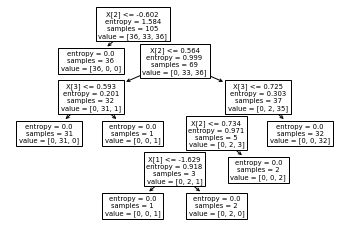

In [14]:
tree.plot_tree(de_clf)

2. ## Support Vector Machine: (support vector machine and logistic regression are binary classification)

## If OverFit Occure reduce parametr C and Gamma 

In [15]:
from sklearn.svm import SVC

In [16]:
parametr_svm = [{'kernel':['rbf', 'poly'],'degree':[2, 3, 4, 5], 'gamma':['auto', 'scale'], 'C':[0.001, 1000]}]

In [17]:
sv_clf = SVC(probability=True)
svc_grid = GridSearchCV(sv_clf, parametr_svm)
svc_grid.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [0.001, 1000], 'degree': [2, 3, 4, 5],
                          'gamma': ['auto', 'scale'],
                          'kernel': ['rbf', 'poly']}])

In [18]:
y_predict_svm = svc_grid.predict(x_test)
accuracy_score(y_test, y_predict_svm)

0.9333333333333333

# You Should Always Try Linear Kernel first , especially if the training set is very larg

In [19]:
from sklearn.svm import LinearSVC
linear = LinearSVC(C=100, loss='hinge')
linear.fit(x_train, y_train)
predict_linear = linear.predict(x_test)
accuracy_score(y_test, predict_linear)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8888888888888888

3. # Ensemble Learning 

In [20]:
from sklearn.ensemble import VotingClassifier

In [21]:
voting = VotingClassifier(estimators=[('svm', svc_grid), ('decision', grid_de)], voting='soft')

voting.fit(x_train, y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


VotingClassifier(estimators=[('svm',
                              GridSearchCV(estimator=SVC(probability=True),
                                           param_grid=[{'C': [0.001, 1000],
                                                        'degree': [2, 3, 4, 5],
                                                        'gamma': ['auto',
                                                                  'scale'],
                                                        'kernel': ['rbf',
                                                                   'poly']}])),
                             ('decision',
                              GridSearchCV(cv=3,
                                           estimator=DecisionTreeClassifier(),
                                           param_grid=[{'criterion': ['entropy',
                                                                      'gini'],
                                                        'max_depth': [10, 15,
                   

In [22]:
for clf in (svc_grid, voting, grid_de):
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_predict))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

GridSearchCV 0.9333333333333333
VotingClassifier 0.8888888888888888
GridSearchCV 0.9555555555555556
